In [1]:
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_curve, roc_auc_score

# Loading and Labeling data

In [2]:
import os
import csv

# Paths to directories
base_dir = 'breastcancer'
train_dir = os.path.join(base_dir, 'train')
healthy_dir = os.path.join(train_dir, 'healthy')
sick_dir = os.path.join(train_dir, 'sick')

# Create a CSV file
csv_filename = 'images_labels.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    

    # Header of the CSV file
    csv_writer.writerow(["Image_Name", "Label"])

    # Process healthy images
    for filename in os.listdir(healthy_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image file extensions
            csv_writer.writerow([filename,'Healthy'])

    # Process sick images
    for filename in os.listdir(sick_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image file extensions
            csv_writer.writerow([filename, 'Sick'])

print(f"CSV file '{csv_filename}' has been created.")

CSV file 'images_labels.csv' has been created.


In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le=LabelEncoder()
df=pd.read_csv('images_labels.csv')
df['Label']=le.fit_transform(df['Label'])
df.head(3)



,Image_Name,Label
0,H_1.jpg,0
1,H_10.jpg,0
2,H_100.jpg,0


In [4]:
df.tail(3)


,Image_Name,Label
1441,S_94.jpg,1
1442,S_95.jpg,1
1443,S_96.jpg,1


# Data representation

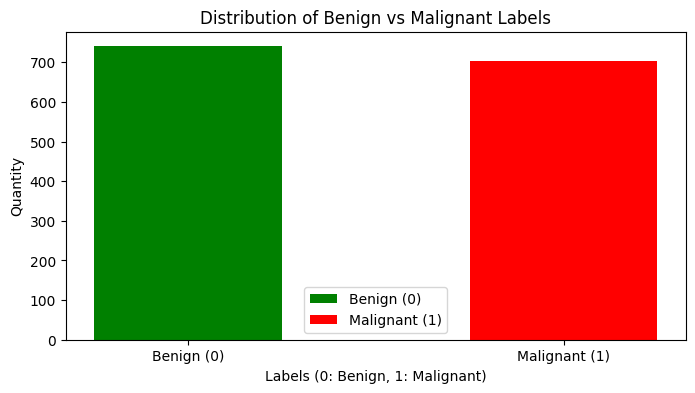

----------------------------------------------------------------------------------------------------
The healthy count is 740
The Malignant count is 704
----------------------------------------------------------------------------------------------------


In [5]:
# Plotting the histogram for each label separately to specify different colors
plt.figure(figsize=(8, 4))

# Extracting counts for each label
healthy_counts = df[df['Label'] == 0]['Label'].value_counts()
malignant_counts = df[df['Label'] == 1]['Label'].value_counts()

# Plotting the histograms
plt.bar(healthy_counts.index, healthy_counts.values, width=0.5, color='green', label='Benign (0)')
plt.bar(malignant_counts.index, malignant_counts.values, width=0.5, color='red', label='Malignant (1)')

# Adding labels and title
plt.title("Distribution of Benign vs Malignant Labels")
plt.xlabel("Labels (0: Benign, 1: Malignant)")
plt.ylabel("Quantity")
plt.xticks(ticks=[0, 1], labels=["Benign (0)", "Malignant (1)"])
plt.legend()
plt.grid(False)

# Show the plot
plt.show()
healthy_count = df[df['Label'] == 0].shape[0]
malignant_count = df[df['Label'] == 1].shape[0]
print("--"*50)
# Display the counts
print(f'The healthy count is {healthy_count}')
print(f'The Malignant count is {malignant_count}')
print("--"*50)

# Data Overview

In [6]:
import os
from PIL import Image
from IPython.display import display, HTML

# Function to display images side by side using IPython display
def display_images_side_by_side(image_paths, title):
    images_html = ""
    for image_path in image_paths:
        img = Image.open(image_path)
        images_html += f"<img style='width: 250px; margin: 20px; display: inline-block;align: center' src='{image_path}' alt='{title}' />"
    display(HTML(f"<div style='text-align: center;'>{title}</div>" + images_html))

# Specific filenames to display
healthy_images = ['H_1.jpg', 'H_2.jpg', 'H_3.jpg']
sick_images = ['S_1.jpg', 'S_2.jpg', 'S_12.jpg']

# Base directory where the images are located
base_dir = 'breastcancer/train'

# Subdirectories for healthy and sick images (converted to Unix-like paths for this environment)
healthy_dir = os.path.join(base_dir, 'Healthy')
sick_dir = os.path.join(base_dir, 'Sick')

# Full paths to the specified images
healthy_image_paths = [os.path.join(healthy_dir, img) for img in healthy_images]
sick_image_paths = [os.path.join(sick_dir, img) for img in sick_images]

# Display the selected images using IPython display
display_images_side_by_side(healthy_image_paths, 'Healthy')
display_images_side_by_side(sick_image_paths, 'Sick')


In [7]:
import os
import csv
from PIL import Image

# Paths to directories
base_dir = 'breastcancer'
train_dir = os.path.join(base_dir, 'train')
healthy_dir = os.path.join(train_dir, 'healthy')
sick_dir = os.path.join(train_dir, 'sick')
resized_dir = os.path.join(train_dir, 'resized')
os.makedirs(resized_dir, exist_ok=True)  # Make sure the resized directory exists

csv_filename = 'images_labels_resized.csv'

# Desired size (you can change this based on your needs)
desired_size = (224, 224)

# Create or overwrite the CSV file
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Image_Name", "Label"])  # Write header

    # Process and save healthy images
    for filename in os.listdir(healthy_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image file extensions
            image_path = os.path.join(healthy_dir, filename)
            with Image.open(image_path) as img:
                img_resized = img.resize(desired_size, Image.LANCZOS)
                img_resized.save(os.path.join(resized_dir, filename))
            csv_writer.writerow([filename, 0])

    # Process and save sick images
    for filename in os.listdir(sick_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image file extensions
            image_path = os.path.join(sick_dir, filename)
            with Image.open(image_path) as img:
                img_resized = img.resize(desired_size, Image.LANCZOS)
                img_resized.save(os.path.join(resized_dir, filename))
            csv_writer.writerow([filename, 1])

print(f"Images have been resized, saved in '{resized_dir}' directory, and details stored in '{csv_filename}'.")

Images have been resized, saved in 'breastcancer\train\resized' directory, and details stored in 'images_labels_resized.csv'.


In [8]:
from IPython.display import display, HTML
from PIL import Image
import os

# Function to display original and resized images side by side using HTML
def compare_images_html(original_path, resized_path, title):
    # Generate the HTML to display images side by side
    images_html = f"""
    <div>
        <div style='float: left;margin: 20px'>
            <p>Original {title}:</p>
            <img src='{original_path}' width='280' />
        </div>
        <div style='float: left; padding-left: 40px;'>
            <p>Resized {title}:</p>
            <img src='{resized_path}' width='220' />
        </div>
    </div>
    <div style='clear: both;'></div>
    """
    
    # Display HTML
    display(HTML(images_html))

# Assuming the base directory is the current working directory since no absolute path is provided
base_dir = 'breastcancer/train'
healthy_dir = os.path.join(base_dir, 'Healthy')
sick_dir = os.path.join(base_dir, 'Sick')
resized_dir = os.path.join(base_dir, 'Resized')
os.makedirs(resized_dir, exist_ok=True)  # Ensure the resized directory exists

# File names for demonstration
healthy_file = 'H_1.jpg'
sick_file = 'S_1.jpg'

# Paths for demonstration
healthy_path = os.path.join(healthy_dir, healthy_file)
resized_healthy_path = os.path.join(resized_dir, healthy_file)
sick_path = os.path.join(sick_dir, sick_file)
resized_sick_path = os.path.join(resized_dir, sick_file)

# Check if the original and resized images exist and display them
if os.path.isfile(healthy_path) and os.path.isfile(resized_healthy_path):
    # Display the comparison between original and resized images for a healthy image
    compare_images_html(healthy_path, resized_healthy_path, 'Healthy')
else:
    print(f"Missing files for healthy images: {healthy_path} or {resized_healthy_path}")

if os.path.isfile(sick_path) and os.path.isfile(resized_sick_path):
    # Display the comparison between original and resized images for a sick image
    compare_images_html(sick_path, resized_sick_path, 'Sick')
else:
    print(f"Missing files for sick images: {sick_path} or {resized_sick_path}")

##AUGMENTATION

In [9]:
import cv2
import numpy as np
import pandas as pd
import os
import random
import shutil

os.listdir()

['.ipynb_checkpoints',
 'breastcancer',
 'images_labels.csv',
 'images_labels_resized.csv',
 'images_labels_resized_noisy.csv',
 'KNN.py',
 'logistic.py',
 'RandomForest.py',
 'reveiw.ipynb',
 'reveiw2.ipynb',
 'XGB.py']

In [10]:
image_dir = r"breastcancer\train\resized"
noisy_image_dir = r"breastcancer\train\resized_noisy"
csv_path = r"images_labels_resized.csv"
noisy_csv_path = r"images_labels_resized_noisy.csv"

In [11]:
images_labels_df = pd.read_csv(csv_path)
images_labels_df.head()

,Image_Name,Label
0,H_1.jpg,0
1,H_10.jpg,0
2,H_100.jpg,0
3,H_101.jpg,0
4,H_102.jpg,0


In [12]:
if not os.path.exists(noisy_image_dir):
    os.makedirs(noisy_image_dir)

In [13]:
for filename in os.listdir(image_dir):
    original_path = os.path.join(image_dir,filename)
    copy_path = os.path.join(noisy_image_dir,filename)
    shutil.copy2(original_path,copy_path)

## NOISE ALGORITHM

In [14]:
def add_rician_noise(image, noise_level=25):
    if len(image.shape) == 2:  # Grayscale image, single channel
        row, col = image.shape
        noise = np.random.normal(0, noise_level, (row, col))
        noisy_image = np.sqrt((image + noise)**2 + noise**2)
    else:  # Color image, three channels
        row, col, ch = image.shape
        noise = np.random.normal(0, noise_level, (row, col, ch))
        noisy_image = np.sqrt((image + noise)**2 + noise**2)
    return noisy_image.astype(np.uint8)

def add_speckle_noise(image, noise_level=0.05):
    if len(image.shape) == 2:  # Grayscale image, single channel
        row, col = image.shape
        gauss = np.random.randn(row, col)
    else:  # Color image, three channels
        row, col, ch = image.shape
        gauss = np.random.randn(row, col, ch)

    noisy = image + image * gauss * noise_level
    return np.clip(noisy, 0, 255).astype(np.uint8) 

def add_salt_and_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05):
    """
    Add salt and pepper noise to an image.
    
    Parameters:
    - image: The input image.
    - salt_prob: Probability of adding salt noise.
    - pepper_prob: Probability of adding pepper noise.
    
    Returns:
    - Noisy image.
    """
    noisy_image = np.copy(image)
    # Salt noise
    num_salt = np.ceil(salt_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
    if len(image.shape) == 2:  # Grayscale image
        noisy_image[tuple(coords)] = 255
    else:  # Color image
        noisy_image[tuple(coords) + (np.random.randint(0, image.shape[2], int(num_salt)),)] = 255

    # Pepper noise
    num_pepper = np.ceil(pepper_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
    if len(image.shape) == 2:  # Grayscale image
        noisy_image[tuple(coords)] = 0
    else:  # Color image
        noisy_image[tuple(coords) + (np.random.randint(0, image.shape[2], int(num_pepper)),)] = 0
    
    return noisy_image


In [15]:
displayed_noises = {
    'rician': False,
    'speckle': False,
    'salt_and_pepper': False
}

def process_and_save_noisy_image(filename, label, display_sample=False):
    image_path = os.path.join(image_dir, filename)

    # Randomly select a noise function
    noise_functions = [add_rician_noise, add_speckle_noise, add_salt_and_pepper_noise]
    chosen_noise_function = random.choice(noise_functions)
    
    # Decide the noise type string for display tracking
    noise_type = 'rician' if chosen_noise_function == add_rician_noise else (
                 'speckle' if chosen_noise_function == add_speckle_noise else 'salt_and_pepper')
    
    # If the chosen function is add_rician_noise, read the image as grayscale
    read_mode = cv2.IMREAD_GRAYSCALE if chosen_noise_function == add_rician_noise else cv2.IMREAD_UNCHANGED
    image = cv2.imread(image_path, read_mode)
    
    # Check if image is read properly
    if image is None:
        raise ValueError(f"Image at {image_path} could not be read.")
    
    # Apply the noise function
    noisy_image = chosen_noise_function(image)
    
    # Display the image if required and it has not been displayed before for this noise type
    if display_sample and not displayed_noises[noise_type]:
        if len(noisy_image.shape) == 3:  # If the image is color (3 channels)
            noisy_image_rgb = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)
            plt.imshow(noisy_image_rgb)
        else:  # If the image is grayscale
            plt.imshow(noisy_image, cmap='gray')

        plt.title(f"Sample Image with {noise_type.capitalize()} Noise")
        plt.show()
        displayed_noises[noise_type] = True

    
    noisy_filename = f"noisy_{filename}"
    cv2.imwrite(os.path.join(noisy_image_dir, noisy_filename), noisy_image)

    return [noisy_filename, label]

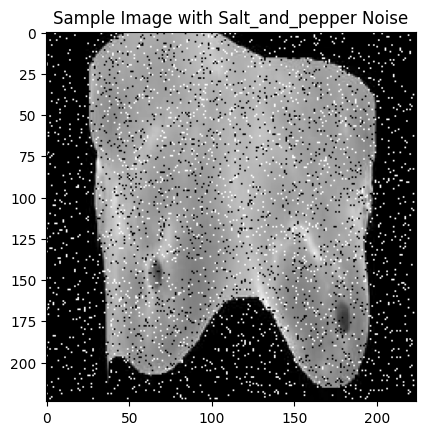

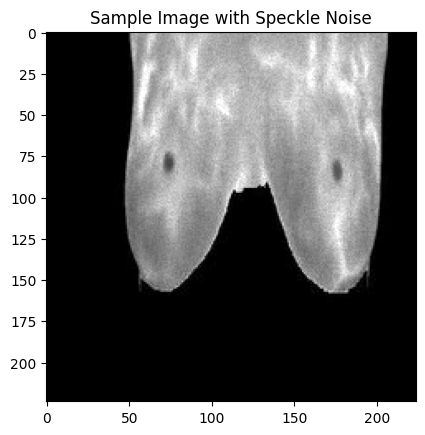

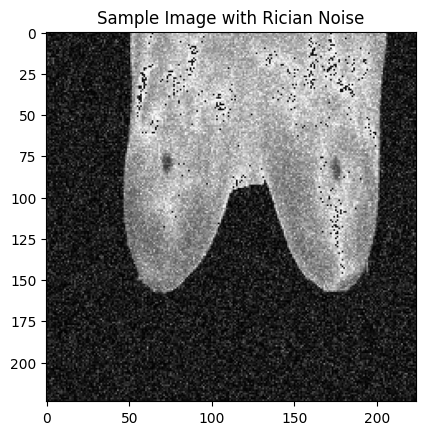

In [16]:
import pandas as pd

new_csv_data = []

for index, row in images_labels_df.iterrows():
    # Set display_sample to True to show the image
    processed_data = process_and_save_noisy_image(row['Image_Name'], row['Label'], display_sample=True)
    new_csv_data.append({'Image_Name': processed_data[0], 'Label': processed_data[1]})

noisy_images_labels_df = pd.concat([images_labels_df, pd.DataFrame(new_csv_data)], ignore_index=True)
noisy_images_labels_df.to_csv(noisy_csv_path, index=False)

# Converting Images into numpy arrays and flattening them

In [17]:
import os
import csv
import numpy as np
from PIL import Image

base_dir = 'breastcancer'
train_dir = os.path.join(base_dir, 'train')
resized_dir = os.path.join(train_dir, 'resized_noisy')
csv_filename = 'images_labels_resized.csv'

flattened_images_list = []
labels_list = []

with open(csv_filename, 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    next(csv_reader)  # Skip the header
    
    for row in csv_reader:
        image_name, label = row
        image_path = os.path.join(resized_dir, image_name)

        with Image.open(image_path) as img:
            img_arr = np.array(img)
            flattened_img_arr = img_arr.flatten()  # Flatten the image
            flattened_images_list.append(flattened_img_arr)
            labels_list.append(int(label))

# Convert lists to numpy arrays
x = np.array(flattened_images_list)
y = np.array(labels_list)
df=pd.DataFrame(x)
df['target']=y

print(f"Flattened images numpy shape: {x.shape}")
print(f"Labels numpy shape: {y.shape}")

Flattened images numpy shape: (1444, 50176)
Labels numpy shape: (1444,)


In [18]:
x,y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([0, 0, 0, ..., 1, 1, 1]))

# Scaling the data

In [19]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x =s.fit_transform(x)

In [20]:
x

array([[-0.13889682, -0.14942555, -0.16532217, ..., -0.23096791,
        -0.21544404, -0.19482728],
       [-0.13889682, -0.14942555, -0.16532217, ..., -0.23096791,
        -0.21544404, -0.19482728],
       [-0.13889682, -0.14942555, -0.16532217, ..., -0.23096791,
        -0.21544404, -0.19482728],
       ...,
       [-0.13889682, -0.14942555, -0.16532217, ..., -0.23096791,
        -0.21544404, -0.19482728],
       [-0.13889682, -0.14942555, -0.16532217, ..., -0.23096791,
        -0.21544404, -0.19482728],
       [-0.13889682, -0.14942555, -0.16532217, ..., -0.23096791,
        -0.21544404, -0.19482728]])

# Splitting train and test data

In [21]:
#import train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,shuffle=True,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(967, 50176)
(477, 50176)
(967,)
(477,)


# Principal Component Analysis(PCA) vs Independent Component Analysis(ICA)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
def eachpca(n):
    
    
    print(f'FOR {n}:  ')
    pca = PCA(n_components = n)
    pca.fit(x)
    data_pca = pca.transform(x)
    data_pca = pd.DataFrame(data_pca,columns=[i for i in range(data_pca.shape[1])])
    data_pca = s.fit_transform(data_pca)


    x_train,x_test,y_train,y_test = train_test_split(data_pca,y,test_size=0.33,shuffle=True,random_state=42)
    models = {
        "XGBoost": XGBClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=10000),
        "KNN": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(random_state=42)
    }
    net_acc = 0
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        net_acc+= accuracy
        print(f"Accuracy for {model_name}: {accuracy * 100:.2f}%")
    print(f"the mean score is {(net_acc/5)*100 }")
        
    print('-' * 50)
    return (net_acc/5)*100

In [23]:
test = [178,200,224,257,300,320]
x_graph_pca=[]
for i in test:
    x_graph_pca.append(eachpca(i))

FOR 178:  
Accuracy for XGBoost: 93.08%
Accuracy for Random Forest: 92.03%
Accuracy for Logistic Regression: 88.05%
Accuracy for KNN: 91.40%
Accuracy for Decision Tree: 82.81%
the mean score is 89.47589098532495
--------------------------------------------------
FOR 200:  
Accuracy for XGBoost: 93.08%
Accuracy for Random Forest: 92.87%
Accuracy for Logistic Regression: 88.05%
Accuracy for KNN: 89.73%
Accuracy for Decision Tree: 81.55%
the mean score is 89.05660377358492
--------------------------------------------------
FOR 224:  
Accuracy for XGBoost: 92.87%
Accuracy for Random Forest: 92.03%
Accuracy for Logistic Regression: 86.79%
Accuracy for KNN: 87.63%
Accuracy for Decision Tree: 80.50%
the mean score is 87.9664570230608
--------------------------------------------------
FOR 257:  
Accuracy for XGBoost: 92.87%
Accuracy for Random Forest: 92.45%
Accuracy for Logistic Regression: 87.84%
Accuracy for KNN: 85.74%
Accuracy for Decision Tree: 80.50%
the mean score is 87.88259958071278


In [24]:
x_graph_pca

[89.47589098532495,
 89.05660377358492,
 87.9664570230608,
 87.88259958071278,
 86.75052410901468,
 85.82809224318659]

In [25]:
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def eachica(n):
    print(f'FOR {n} components:  ')
    
    ica = FastICA(n_components=n, random_state=42)
    data_ica = ica.fit_transform(x)
    data_ica = pd.DataFrame(data_ica, columns=[i for i in range(data_ica.shape[1])])
    s = StandardScaler()
    data_ica = s.fit_transform(data_ica)

    x_train, x_test, y_train, y_test = train_test_split(data_ica, y, test_size=0.20, shuffle=True, random_state=42)
    
    models = {
        "XGBoost": XGBClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=10000),
        "KNN": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(random_state=42)
    }
    net_acc=0
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        net_acc+= accuracy
        print(f"Accuracy for {model_name}: {accuracy * 100:.2f}%")
    
    print('-' * 50) 
    return (net_acc /5)*100

In [26]:
test = [178,200,224,257,300,320]
x_graph_ica =[]
for i in test:
    x_graph_ica.append(eachica(i))

FOR 178 components:  


Accuracy for XGBoost: 75.09%
Accuracy for Random Forest: 76.12%
Accuracy for Logistic Regression: 90.31%
Accuracy for KNN: 93.77%
Accuracy for Decision Tree: 81.66%
--------------------------------------------------
FOR 200 components:  
Accuracy for XGBoost: 75.78%
Accuracy for Random Forest: 77.51%
Accuracy for Logistic Regression: 90.31%
Accuracy for KNN: 92.04%
Accuracy for Decision Tree: 68.51%
--------------------------------------------------
FOR 224 components:  
Accuracy for XGBoost: 71.97%
Accuracy for Random Forest: 70.24%
Accuracy for Logistic Regression: 90.31%
Accuracy for KNN: 91.00%
Accuracy for Decision Tree: 75.09%
--------------------------------------------------
FOR 257 components:  
Accuracy for XGBoost: 68.86%
Accuracy for Random Forest: 70.93%
Accuracy for Logistic Regression: 92.04%
Accuracy for KNN: 88.24%
Accuracy for Decision Tree: 59.86%
--------------------------------------------------
FOR 300 components:  
Accuracy for XGBoost: 71.63%
Accuracy for Random

In [27]:
x_graph_ica

[83.3910034602076,
 80.83044982698962,
 79.72318339100346,
 75.98615916955018,
 76.53979238754324,
 74.67128027681662]

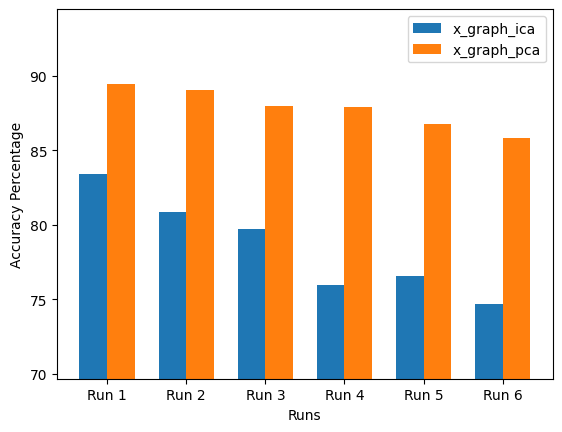

In [28]:
labels = ['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5', 'Run 6']

# Set the width of the bars and the bar positions
bar_width = 0.35
x = np.arange(len(labels))

# Create the side-by-side bar graph
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, x_graph_ica, bar_width, label='x_graph_ica')
bar2 = ax.bar(x + bar_width/2, x_graph_pca, bar_width, label='x_graph_pca')

# Set the y-axis limits to accommodate the data range
ax.set_ylim(min(min(x_graph_ica), min(x_graph_pca)) - 5, max(max(x_graph_ica), max(x_graph_pca)) + 5)

# Add labels and a legend
ax.set_xlabel('Runs')
ax.set_ylabel('Accuracy Percentage')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

# After analysis,we find pca better suits for our data,we take the components size with maximum accuracy

In [29]:
max_acc_component = test[x_graph_pca.index(max(x_graph_pca))]
max_acc_component

178

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = max_acc_component)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
x_train,x_test

(array([[-1.50022889e+02, -7.20739949e+01, -3.29715907e+00, ...,
         -1.39971436e+00,  1.21252176e+00, -4.31252138e+00],
        [-1.11286108e+02,  1.79263623e+01, -1.01040621e+02, ...,
          9.64986108e-02, -9.66993138e+00, -1.22944432e+00],
        [-1.42162036e+02, -1.33327202e+02,  2.03569714e+02, ...,
         -9.81532688e+00,  4.07525585e+00, -2.24168784e+00],
        ...,
        [ 1.52191209e+02,  6.03833429e+01,  3.00562474e+01, ...,
          5.05419999e+00, -1.82891185e+00,  4.04706851e+00],
        [-6.94201561e+01,  1.30617094e+01, -1.20049045e+02, ...,
          7.15063910e+00, -4.81852972e+00, -4.11740071e+00],
        [-1.29783360e+01,  2.40845912e+02, -2.45279506e+01, ...,
         -1.95559955e+00,  8.72867734e-01, -2.48057765e+00]]),
 array([[ 2.26473630e+01,  1.48716035e+01, -8.90716782e+01, ...,
         -4.00938791e+00, -1.72651353e+00, -1.43157357e+00],
        [ 7.30820196e+01,  1.45650353e+02,  1.48665606e+01, ...,
         -2.76550175e+00,  1.18325050e

#  Hyperparameter tuning for xgboost

In [31]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
}

clf_xgb = XGBClassifier(objective='binary:logistic')
random_search_xgb = RandomizedSearchCV(clf_xgb, param_distributions=param_dist, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
random_search_xgb.fit(x_train, y_train)

print("RandomizedSearchCV - Best parameters:", random_search_xgb.best_params_)
print("RandomizedSearchCV - Best cross-validation score:", random_search_xgb.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomizedSearchCV - Best parameters: {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.8}
RandomizedSearchCV - Best cross-validation score: 0.910020832220501


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [4, 5, 6],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0.1, 0.2],
}

grid_search_xgb = GridSearchCV(clf_xgb, param_grid=param_grid, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_xgb.fit(x_train, y_train)

print("GridSearchCV - Best parameters:", grid_search_xgb.best_params_)
print("GridSearchCV - Best cross-validation score:", grid_search_xgb.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
GridSearchCV - Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}
GridSearchCV - Best cross-validation score: 0.9131189573206561


In [33]:
from bayes_opt import BayesianOptimization

def xgb_evaluate(max_depth, gamma, colsample_bytree, learning_rate, n_estimators):
    params = {
        'max_depth': int(max_depth),
        'gamma': gamma,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),
        'objective': 'binary:logistic',
    }
    clf = XGBClassifier(**params)
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    return accuracy_score(y_test, predictions)

optimizer = BayesianOptimization(
    f=xgb_evaluate,
    pbounds={
        'max_depth': (3, 8),
        'gamma': (0, 0.4),
        'colsample_bytree': (0.6, 1.0),
        'learning_rate': (0.01, 0.3),
        'n_estimators': (50, 200)
    },
    random_state=42,
)
optimizer.maximize(init_points=5, n_iter=10)

print("Bayesian Optimization - Best parameters:", optimizer.max['params'])


|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.9245    | 0.7498    | 0.3803    | 0.2223    | 5.993     | 73.4      |
| 2         | 0.9266    | 0.6624    | 0.02323   | 0.2612    | 6.006     | 156.2     |
| 3         | 0.9266    | 0.6082    | 0.388     | 0.2514    | 4.062     | 77.27     |
| 4         | 0.9224    | 0.6734    | 0.1217    | 0.1622    | 5.16      | 93.68     |
| 5         | 0.914     | 0.8447    | 0.0558    | 0.09472   | 4.832     | 118.4     |
| 6         | 0.9308    | 0.992     | 0.2408    | 0.1789    | 6.74      | 171.8     |
| 7         | 0.8595    | 0.6       | 0.0       | 0.01      | 3.0       | 187.6     |
| 8         | 0.914     | 0.6       | 0.4       | 0.2201    | 8.0       | 140.6     |
| 9         | 0.9057    | 0.6       | 0.0       | 0.1789    | 3.0       | 54.75     |
| 10        | 0.8637    | 1.0       | 0.4       | 0.01

# Extracting Best Parameters and Comparing

In [34]:
# Extract best parameters and scores
best_params_random = random_search_xgb.best_params_
best_score_random = random_search_xgb.best_score_

best_params_grid = grid_search_xgb.best_params_
best_score_grid = grid_search_xgb.best_score_

best_params_bayesian = optimizer.max['params']
best_score_bayesian = optimizer.max['target']

# Determine which set of parameters is the best
best_algo = "RandomizedSearchCV"
best_params = best_params_random
best_score = best_score_random

if best_score_grid > best_score:
    best_algo = "GridSearchCV"
    best_params = best_params_grid
    best_score = best_score_grid

if best_score_bayesian > best_score:
    best_algo = "Bayesian Optimization"
    best_params = best_params_bayesian
    best_score = best_score_bayesian

print(f"Best Algorithm: {best_algo}")
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")


Best Algorithm: Bayesian Optimization
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.014906365052275626, 'learning_rate': 0.23267643725728093, 'max_depth': 8.0, 'n_estimators': 174.9230034254178}
Best Cross-Validation Score: 0.9454926624737946


# Train with Best Parameters:

In [35]:

best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

clf_best = XGBClassifier(**best_params, objective='binary:logistic')
clf_best.fit(x_train, y_train)

predictions = clf_best.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy}")


Test Accuracy: 0.9454926624737946


In [36]:
from sklearn.metrics import accuracy_score
import numpy as np

# Set a threshold
threshold = 0.3

best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

clf_best = XGBClassifier(**best_params, objective='binary:logistic')
clf_best.fit(x_train, y_train)

# Get the probabilities of the positive class
probabilities = clf_best.predict_proba(x_test)[:, 1]

# Apply the threshold to the probabilities to get the final predictions
predictions = (probabilities >= threshold).astype('int')

accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy*100}%")

Test Accuracy: 93.50104821802935%


              precision    recall  f1-score   support

           0       0.96      0.91      0.93       244
           1       0.91      0.96      0.94       233

    accuracy                           0.94       477
   macro avg       0.94      0.94      0.94       477
weighted avg       0.94      0.94      0.94       477



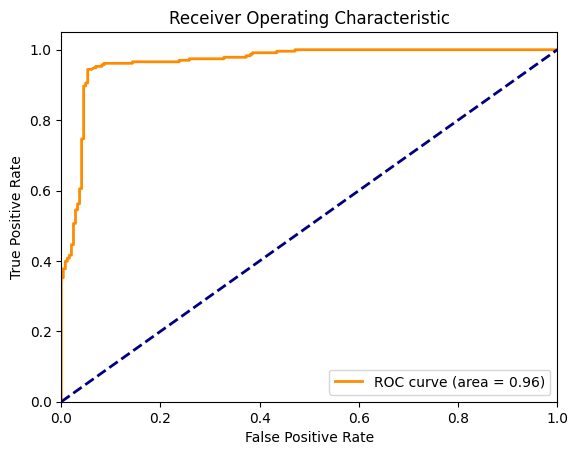

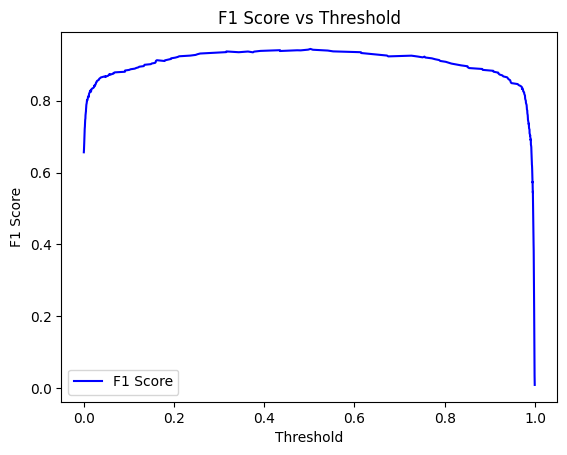

In [37]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Print classification report
print(classification_report(y_test, predictions))

# Calculate the probabilities of the positive class
y_scores = clf_best.predict_proba(x_test)[:, 1]

# Calculate the false positive rates and true positive rates
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the AUC-ROC value
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate precision, recall, thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate F1 score for each threshold
f1_scores = 2*recall*precision / (recall + precision)

# Plot the F1 Score graph
plt.figure()
plt.plot(thresholds, f1_scores[:-1], 'b-', label='F1 Score')
plt.title('F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.show()

# Visualize Confusion Matrix, Loss Curve, and Output Prediction Graph:



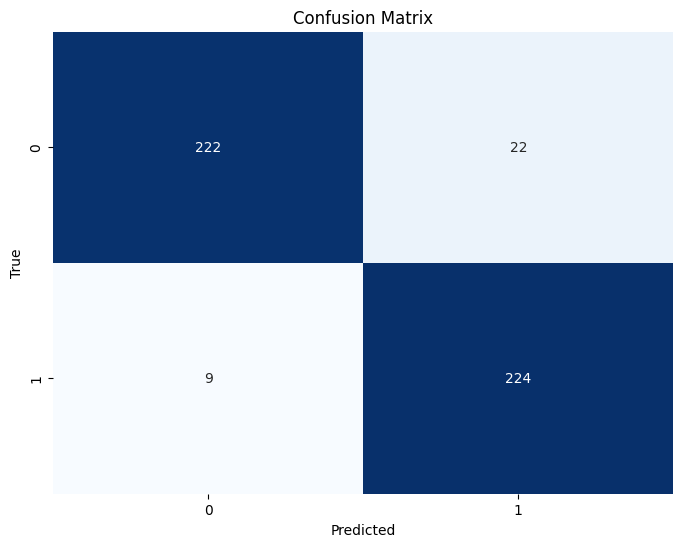

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Output prediction graph and loss curve

In [39]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Adjusting parameters for Bayesian Optimization (they might be in float)
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

params = best_params
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'

# Create an empty dictionary to hold evaluation results
evals_result = {}

# Training the model
evals = [(dtrain, 'train')]
num_round = best_params['n_estimators']
bst = xgb.train(params, dtrain, num_round, evals=evals, evals_result=evals_result)

# Extracting log loss from training
train_logloss = evals_result['train']['logloss']
#eval_logloss = evals_result['eval']['logloss']




[0]	train-logloss:0.54896
[1]	train-logloss:0.44113
[2]	train-logloss:0.35835
[3]	train-logloss:0.29738
[4]	train-logloss:0.25110


c:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:44:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-logloss:0.21445
[6]	train-logloss:0.18501
[7]	train-logloss:0.16096
[8]	train-logloss:0.14371
[9]	train-logloss:0.12704
[10]	train-logloss:0.11438
[11]	train-logloss:0.10421
[12]	train-logloss:0.09556
[13]	train-logloss:0.08834
[14]	train-logloss:0.08181
[15]	train-logloss:0.07658
[16]	train-logloss:0.07232
[17]	train-logloss:0.06789
[18]	train-logloss:0.06440
[19]	train-logloss:0.06125
[20]	train-logloss:0.05895
[21]	train-logloss:0.05672
[22]	train-logloss:0.05463
[23]	train-logloss:0.05280
[24]	train-logloss:0.05126
[25]	train-logloss:0.04964
[26]	train-logloss:0.04838
[27]	train-logloss:0.04706
[28]	train-logloss:0.04593
[29]	train-logloss:0.04509
[30]	train-logloss:0.04426
[31]	train-logloss:0.04346
[32]	train-logloss:0.04269
[33]	train-logloss:0.04189
[34]	train-logloss:0.04125
[35]	train-logloss:0.04076
[36]	train-logloss:0.04021
[37]	train-logloss:0.03966
[38]	train-logloss:0.03919
[39]	train-logloss:0.03873
[40]	train-logloss:0.03829
[41]	train-logloss:0.03786
[42]	t

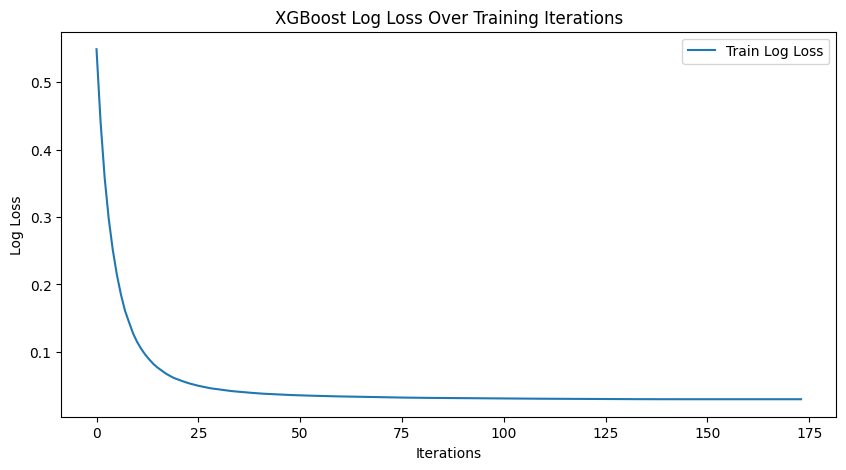

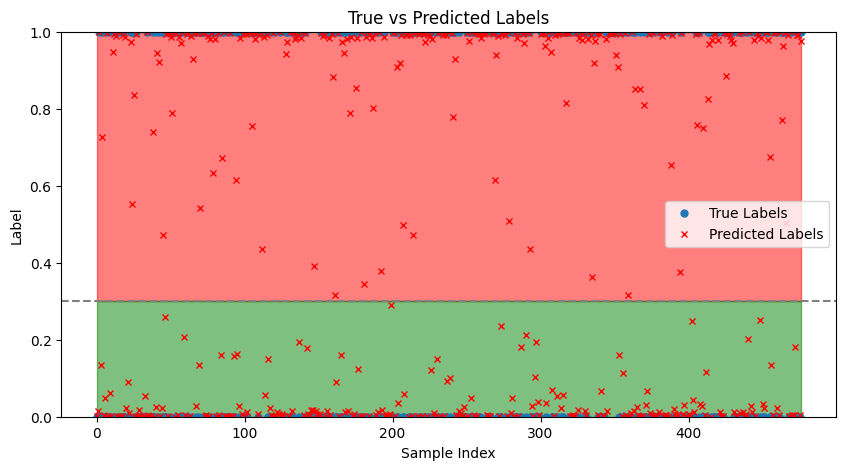

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(train_logloss, label='Train Log Loss')
#plt.plot(eval_logloss, label='Eval Log Loss')
plt.legend()
plt.title('XGBoost Log Loss Over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.show()

# Making predictions
predictions = bst.predict(dtest)

# Output Prediction Graph
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='True Labels', marker='o', linestyle='', markersize=5)
plt.plot(predictions, label='Predicted Labels', color='red', linestyle='', marker='x', markersize=5)
plt.axhline(y=0.3, color='gray', linestyle='--')
plt.fill_between(range(len(y_test)), 0.3, 1, color='red', alpha=0.5)
plt.fill_between(range(len(y_test)), 0, 0.3, color='green', alpha=0.5)
plt.ylim(0, 1)  # Setting y-axis limits
plt.legend()
plt.title("True vs Predicted Labels")
plt.ylabel("Label")
plt.xlabel("Sample Index")
plt.show()

# Random Forest Hyperparameter tuning

In [41]:
# Parameters for Grid and Randomized Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Parameters for Bayesian Optimization
bounds = {
    'n_estimators': (50, 150),
    'max_depth': (5, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}


# Grid Search for Random Forest

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)
pca.fit(x)
data_pca = pca.transform(x)
data_pca = pd.DataFrame(data_pca,columns=[i for i in range(data_pca.shape[1])])
data_pca = s.fit_transform(data_pca)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data_pca,y,test_size=0.20,shuffle=True,random_state=42)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 2. 3. 4. 5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform the grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Retrieve and display the best parameters and best score
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_cv_score)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Cross-Validation Score: 0.9203621601410182


# 2.randomized search

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parameters for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform the randomized search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

# Retrieve and display the best parameters and best score
best_params_random = random_search.best_params_
best_cv_score_random = random_search.best_score_

print("Randomized Search - Best Parameters:", best_params_random)
print("Randomized Search - Best Cross-Validation Score:", best_cv_score_random)


Randomized Search - Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}
Randomized Search - Best Cross-Validation Score: 0.9182949628759148


# 3.Bayesian 

In [45]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

# Function to evaluate the performance of the model given hyperparameters
def rf_eval(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    params = {
        'n_estimators': int(n_estimators),
        'max_depth': int(max_depth),
        'min_samples_split': int(min_samples_split),
        'min_samples_leaf': int(min_samples_leaf)
    }
    rf = RandomForestClassifier(**params, random_state=42)
    return cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy').mean()

# Define hyperparameter bounds for Bayesian optimization
bounds = {
    'n_estimators': (50, 150),
    'max_depth': (5, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

# Perform Bayesian optimization
optimizer = BayesianOptimization(f=rf_eval, pbounds=bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)

# Retrieve and display the best parameters and best score
best_params_bayes = optimizer.max['params']
best_cv_score_bayes = optimizer.max['target']

# Convert the parameters to integers
best_params_bayes['n_estimators'] = int(best_params_bayes['n_estimators'])
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])

print("Bayesian Optimization - Best Parameters:", best_params_bayes)
print("Bayesian Optimization - Best Cross-Validation Score:", best_cv_score_bayes)


|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.9018    | 14.36     | 3.852     | 7.856     | 109.9     |
| 2         | 0.8976    | 8.9       | 1.468     | 2.465     | 136.6     |
| 3         | 0.9131    | 20.03     | 3.124     | 2.165     | 147.0     |
| 4         | 0.9049    | 25.81     | 1.637     | 3.455     | 68.34     |
| 5         | 0.9049    | 12.61     | 2.574     | 5.456     | 79.12     |
| 6         | 0.8935    | 23.08     | 3.004     | 3.783     | 56.39     |
| 7         | 0.8976    | 6.23      | 1.055     | 6.804     | 122.4     |
| 8         | 0.881     | 5.112     | 1.121     | 5.732     | 85.21     |
| 9         | 0.8945    | 29.27     | 3.129     | 9.951     | 87.39     |
| 10        | 0.9028    | 16.79     | 1.481     | 8.416     | 59.65     |
| 11        | 0.9111    | 28.46     | 3.119     | 5.601     | 149.8     |
| 12        | 0.908     | 23.9      | 

In [46]:
# Compare cross-validation scores
scores = {
    "Grid Search": best_cv_score,
    "Randomized Search": best_cv_score_random,
    "Bayesian Optimization": best_cv_score_bayes
}

# Determine the method with the highest score
best_method = max(scores, key=scores.get)
print(f"The best method is: {best_method} with a cross-validation score of {scores[best_method]:.4f}")

# Select the best parameters from the best method
if best_method == "Grid Search":
    best_params_final = best_params
elif best_method == "Randomized Search":
    best_params_final = best_params_random
else:
    best_params_final = best_params_bayes

# Initialize and train the Random Forest model with the best parameters
rf_best = RandomForestClassifier(**best_params_final, random_state=42)
rf_best.fit(x_train, y_train)

print("\nModel trained with the best parameters from", best_method)


The best method is: Grid Search with a cross-validation score of 0.9204

Model trained with the best parameters from Grid Search


Confusion Matrix:
[[224  20]
 [ 15 218]]


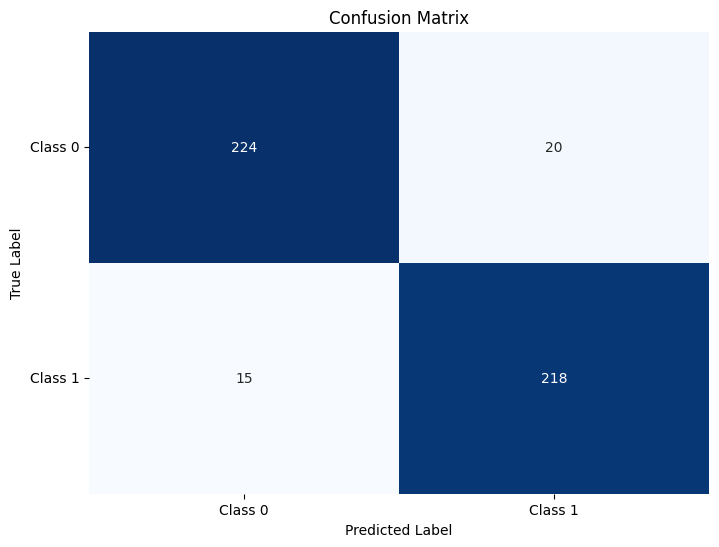

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = rf_best.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2) + 0.5, ['Class 0', 'Class 1'])
plt.yticks(np.arange(2) + 0.5, ['Class 0', 'Class 1'], rotation=0)
plt.show()


To plot the loss curve and output prediction curve, consider the following:

Loss Curve: Random Forest does not inherently have a loss function like gradient boosting methods. 

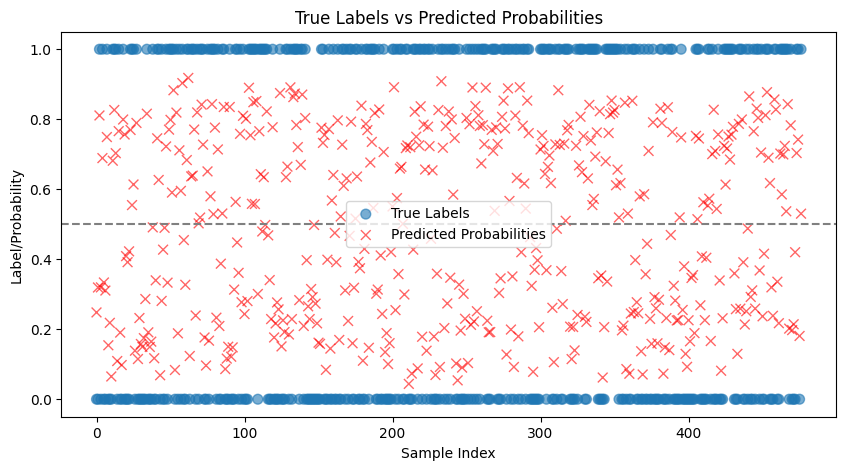

In [48]:
# Predict probabilities for the test set
rf_probs = rf_best.predict_proba(x_test)[:, 1]  # Probabilities of the positive class

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='True Labels', marker='o', linestyle='', s=50, alpha=0.6)
plt.scatter(range(len(y_test)), rf_probs, label='Predicted Probabilities', color='red', marker='x', linestyle='', s=50, alpha=0.6)
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.legend()
plt.title("True Labels vs Predicted Probabilities")
plt.ylabel("Label/Probability")
plt.xlabel("Sample Index")
plt.show()


# Logistic Regression


# 1.Grid Search

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Grid Search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Grid Search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print("Grid Search - Best Parameters:", best_params_grid)
print("Grid Search - Best Score:", best_score_grid)


Grid Search - Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Grid Search - Best Score: 0.8976283318198813


# 2. Randomized Search:

In [50]:
from sklearn.model_selection import RandomizedSearchCV

# Parameters for Randomized Search
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Randomized Search
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Randomized Search - Best Parameters:", best_params_random)
print("Randomized Search - Best Score:", best_score_random)


Randomized Search - Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.001}
Randomized Search - Best Score: 0.8976283318198813


# 3. Bayesian Optimization:

In [51]:
from bayes_opt import BayesianOptimization

# Function for Bayesian Optimization
def logreg_eval(C):
    return cross_val_score(LogisticRegression(C=C, penalty='l2', solver='liblinear'), x_train, y_train, cv=5, scoring='accuracy').mean()

# Bayesian Optimization
optimizer = BayesianOptimization(f=logreg_eval, pbounds={'C': (0.001, 100)}, random_state=42)
optimizer.maximize(init_points=2, n_iter=5)

best_params_bayes = optimizer.max['params']
best_score_bayes = optimizer.max['target']

print("Bayesian Optimization - Best Parameters:", best_params_bayes)
print("Bayesian Optimization - Best Score:", best_score_bayes)


|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.8604    | 37.45     |
| 2         | 0.8625    | 95.07     |
| 3         | 0.8583    | 93.76     |
| 4         | 0.8625    | 10.75     |
| 5         | 0.8604    | 33.56     |
| 6         | 0.8594    | 29.97     |
| 7         | 0.8614    | 10.77     |
Bayesian Optimization - Best Parameters: {'C': 10.748032925464157}
Bayesian Optimization - Best Score: 0.8624859783131242


# Comparing the results

Confusion Matrix:
[[216  28]
 [ 20 213]]


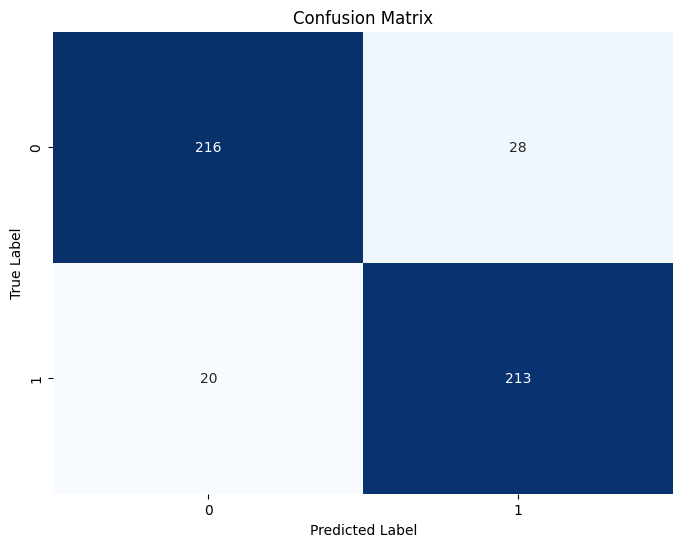

In [52]:
# Select the best hyperparameters from the optimal method
if best_method == "Grid Search":
    best_params_final = best_params_grid
elif best_method == "Randomized Search":
    best_params_final = best_params_random
else:  # Bayesian Optimization
    best_params_final = {'C': best_params_bayes['C'], 'penalty': 'l2', 'solver': 'liblinear'}

# Train the logistic regression model with the best hyperparameters
logreg_best = LogisticRegression(**best_params_final)
logreg_best.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logreg_best.predict(x_test)

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# If you wish to visualize it:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


C:\Users\sanja\AppData\Local\Temp\ipykernel_7112\2599561716.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


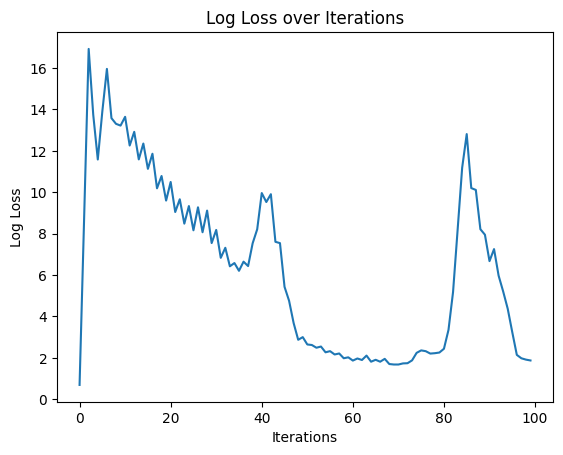

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_log_loss(y_true, y_pred):
    # Avoid division by zero
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def logistic_regression(x, y, num_iterations, learning_rate):
    # Initialize weights and bias to zero
    weights = np.zeros(x.shape[1])
    bias = 0
    losses = []
    
    for i in range(num_iterations):
        # Calculate predictions
        z = np.dot(x, weights) + bias
        predictions = sigmoid(z)
        
        # Compute the loss
        loss = compute_log_loss(y, predictions)
        losses.append(loss)
        
        # Calculate the gradient
        gradient_weights = np.dot(x.T, (predictions - y)) / y.size
        gradient_bias = np.mean(predictions - y)
        
        # Update the weights and bias
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
        
    return weights, bias, losses

# Assuming x_train and y_train are your features and target arrays
# Add intercept term to the features
x_train_intercept = np.hstack((np.ones((x_train.shape[0], 1)), x_train))

# Hyperparameters
num_iterations = 100
learning_rate = 0.1

# Train the model
weights, bias, losses = logistic_regression(x_train_intercept, y_train, num_iterations, learning_rate)

# Plot the log loss over iterations
plt.plot(losses)
plt.title('Log Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.show()


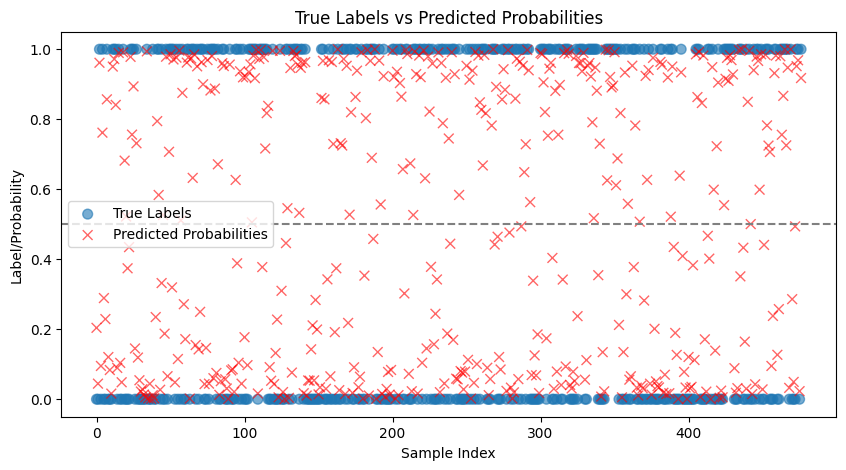

In [54]:
# Predict probabilities for the test set using the best model
logreg_probs = logreg_best.predict_proba(x_test)[:, 1]  # Probabilities of the positive class

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='True Labels', marker='o', linestyle='', s=50, alpha=0.6)
plt.scatter(range(len(y_test)), logreg_probs, label='Predicted Probabilities', color='red', marker='x', linestyle='', s=50, alpha=0.6)
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.legend()
plt.title("True Labels vs Predicted Probabilities")
plt.ylabel("Label/Probability")
plt.xlabel("Sample Index")
plt.show()


# KNN


Unlike logistic regression, KNN doesn't have "iterations" during which it learns from the data; it's a lazy learner. However, we can still perform hyperparameter tuning for KNN to find the best value of 
k (the number of neighbors) which minimizes a loss metric like the error rate or maximizes the accuracy.

The following code will illustrate how to perform hyperparameter tuning for KNN to find the optimal number of neighbors:

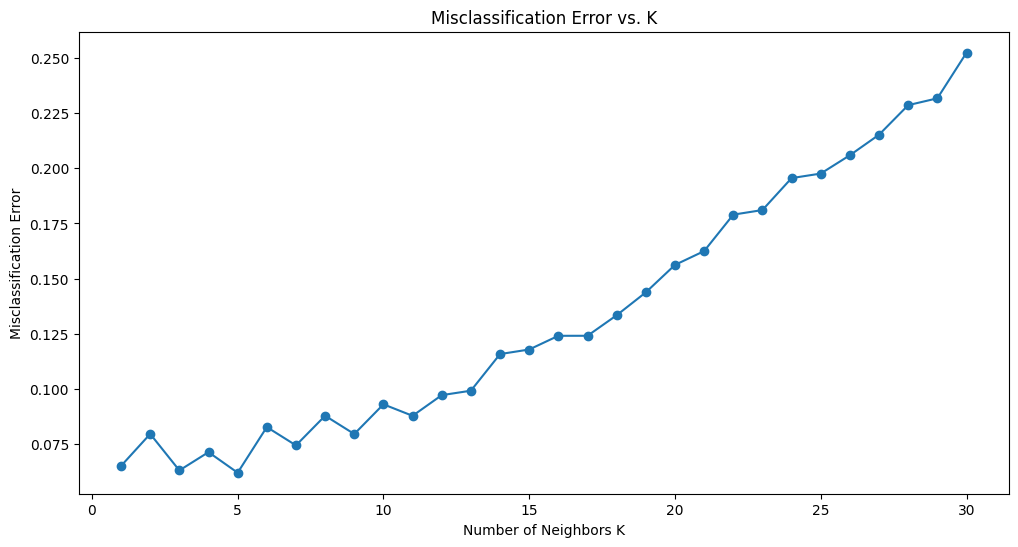

The optimal number of neighbors is 5


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt


# Range of k to test
k_range = range(1, 31)

# Empty list to hold cross-validation scores
cv_scores = []

# Perform 10-fold cross-validation and store the mean accuracy for each value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the misclassification error versus k
# Calculate misclassification error (lower is better)
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(12, 6))
plt.plot(k_range, MSE, marker='o')
plt.title('Misclassification Error vs. K')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Finding the optimal k (with the minimum error)
optimal_k = k_range[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")


In the context of K-Nearest Neighbors (KNN), we typically don't talk about a "loss" since KNN is a non-parametric algorithm that doesn't learn a predictive model with parameters that minimize a loss function. However, you can still measure the performance of a KNN classifier using metrics such as accuracy, or in cases where you want something analogous to loss, you can use the "error rate" which is simply 
1
−
accuracy
1−accuracy.

The error rate can be considered a "loss" in the sense that it measures the rate at which the classifier makes incorrect predictions. A lower error rate corresponds to a better-performing model.

Here is how you can calculate and print the error rate for the optimal 
k found:

python


In [56]:
# Assuming optimal_k is the optimal number of neighbors found previously

# Initialize the KNN model with the optimal number of neighbors
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# Fit the model on the training data
knn_optimal.fit(x_train, y_train)

# Predict on the test data
y_pred = knn_optimal.predict(x_test)

# Calculate the accuracy
accuracy_optimal = accuracy_score(y_test, y_pred)

# Calculate the error rate
error_rate_optimal = 1 - accuracy_optimal

# Print the error rate
print(f"Error rate for the optimal K ({optimal_k}) is: {error_rate_optimal:.2f}")


Error rate for the optimal K (5) is: 0.07


Confusion Matrix:
[[227  17]
 [ 16 217]]


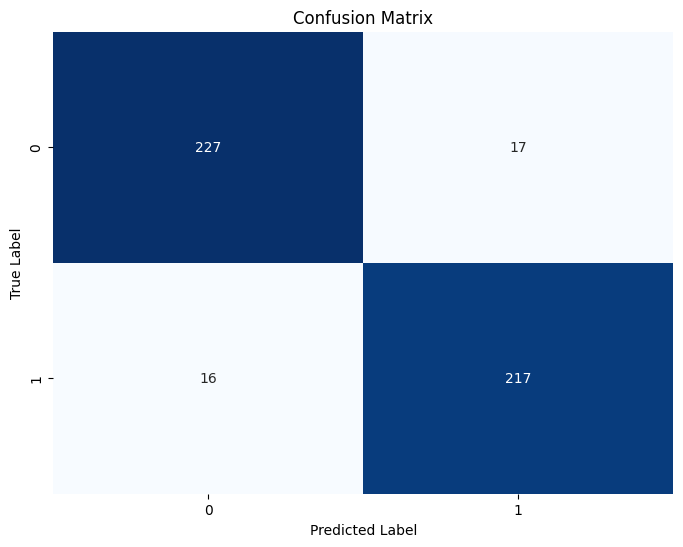

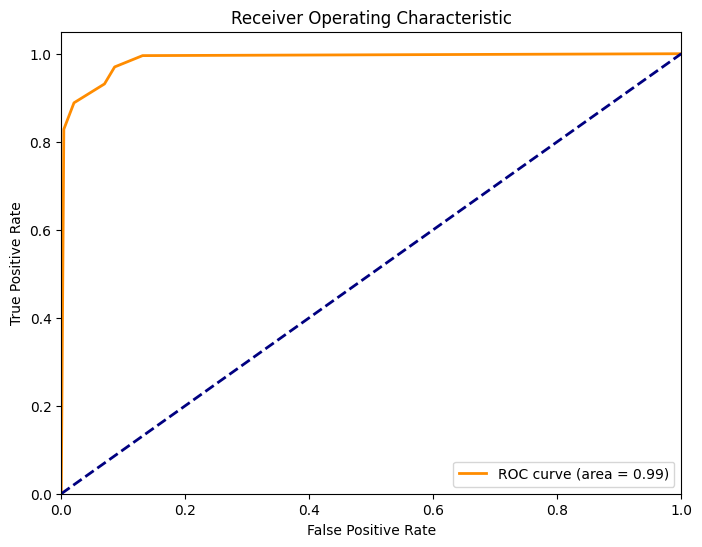

In [57]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import seaborn as sns

# Assuming you have already predicted y_pred using the optimal KNN model

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate the ROC curve and ROC area for the optimal KNN
y_pred_proba = knn_optimal.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# DECISION TREES

Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation score (accuracy): 0.8035575022701777
Confusion Matrix:
[[209  35]
 [ 46 187]]


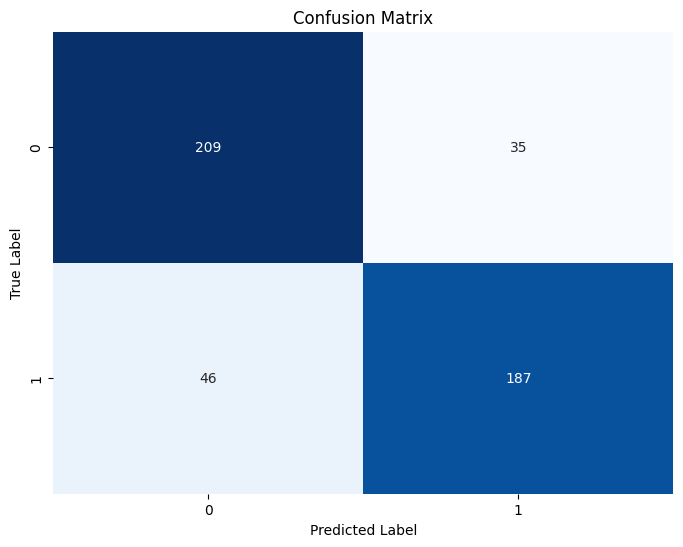

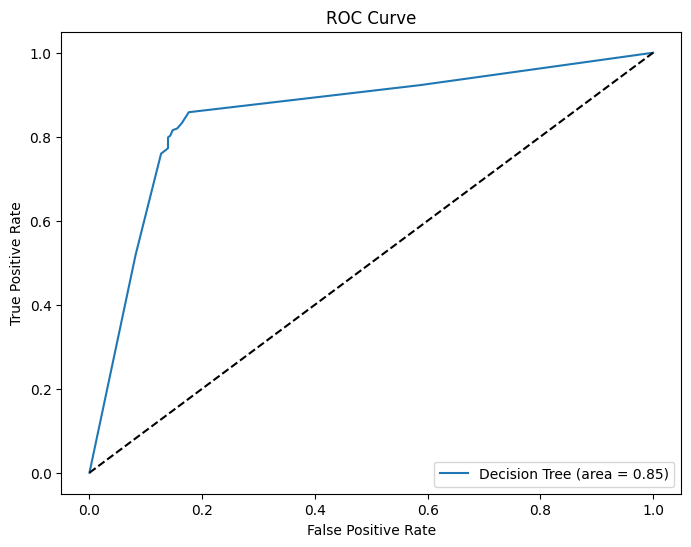

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable, and they have been scaled or preprocessed if necessary

# Define the parameter grid for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Retrieve the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score (accuracy): {best_score}")

# Train the best Decision Tree model
best_dt = grid_search.best_estimator_

# Make predictions
y_pred = best_dt.predict(x_test)
y_pred_proba = best_dt.predict_proba(x_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate and plot ROC curve and ROC area for the best Decision Tree
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


CONCLUSION

Best 3 models before hyper parameter tuning

Accuracy for XGBoost: 93.08%

Accuracy for Random Forest: 92.45%

Accuracy for KNN: 90.78%

After Hyperparameter Tuning:

Accuracy for XGBoost: 93.28%

Accuracy for Random Forest: 92.35%

Accuracy for KNN: 90.78%

Difference In Accuracy:
 Increase in accuracy for XGBoost: 0.2
 Decrease in accuracy for Random Forest: 0.1
 No change for KNN.

  Image_Name  Label
0    H_1.jpg      0
1   H_10.jpg      0
2  H_100.jpg      0
Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomizedSearchCV - Best parameters: {'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
RandomizedSearchCV - Best score: 0.9079643181453984
Test Accuracy: 0.9308176100628931
Confusion Matrix:
[[227  17]
 [ 16 217]]
Predicted Class: Healthy


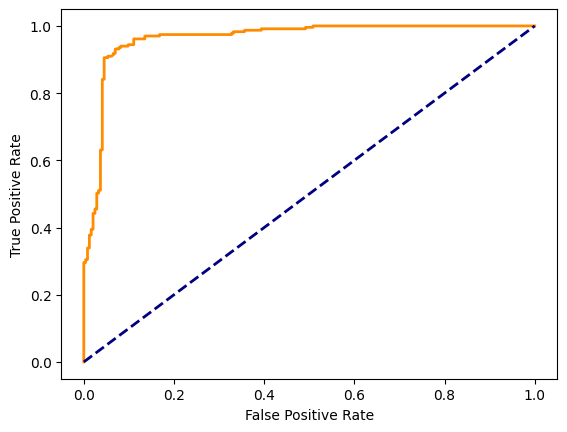

In [59]:
import os
import csv
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.decomposition import PCA  # Import PCA
import matplotlib.pyplot as plt
from joblib import dump, load



# Label Encoding
df = pd.read_csv('images_labels.csv')
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
print(df.head(3))

# Load and Flatten Images
base_dir = 'breastcancer'
train_dir = os.path.join(base_dir, 'train')
resized_dir = os.path.join(train_dir, 'resized_noisy')
csv_filename = 'images_labels_resized.csv'

flattened_images_list = []
labels_list = []

with open(csv_filename, 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    next(csv_reader)  # Skip the header
    
    for row in csv_reader:
        image_name, label = row
        image_path = os.path.join(resized_dir, image_name)

        with Image.open(image_path) as img:
            img_arr = np.array(img)
            flattened_img_arr = img_arr.flatten()  # Flatten the image
            flattened_images_list.append(flattened_img_arr)
            labels_list.append(int(label))

# Convert lists to numpy arrays
X = np.array(flattened_images_list)
y = np.array(labels_list)

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
scaler_filename = 'scaler.joblib'
dump(scaler, scaler_filename)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Adjust n_components as per your requirement
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Save the PCA transformation
pca_filename = 'pca.joblib'
dump(pca, pca_filename)

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
}

# Initialize XGBClassifier
clf_xgb = XGBClassifier(objective='binary:logistic')

# Perform Randomized Search
random_search_xgb = RandomizedSearchCV(clf_xgb, param_distributions=param_dist, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
random_search_xgb.fit(x_train_pca, y_train)

# Best parameters and score
print("RandomizedSearchCV - Best parameters:", random_search_xgb.best_params_)
print("RandomizedSearchCV - Best score:", random_search_xgb.best_score_)

# Train the model with the best parameters
best_params = random_search_xgb.best_params_
clf_best = XGBClassifier(**best_params, objective='binary:logistic')
clf_best.fit(x_train_pca, y_train)

model_filename = 'best_model_XGB.joblib'
dump(clf_best, model_filename)

# Make predictions and evaluate the model
y_pred = clf_best.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute ROC curve and AUC
y_scores = clf_best.predict_proba(x_test_pca)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

def predict_image_class(image_path, scaler, pca, model):
    """
    Predicts the class of an image.

    :param image_path: Path to the image file.
    :param scaler: The StandardScaler used on the training data.
    :param pca: The PCA transformation used on the training data.
    :param model: The trained model.
    :return: Predicted class.
    """
    # Load and preprocess the image
    with Image.open(image_path) as img:
        img_arr = np.array(img)
        flattened_img_arr = img_arr.flatten()

    # Scale and PCA transform
    scaled_img = scaler.transform([flattened_img_arr])
    pca_img = pca.transform(scaled_img)

    # Predict
    prediction = model.predict(pca_img)
    return prediction[0]

# Example usage
clf_loaded = load(model_filename)

image_path = r'D:\Amrita\Sem_5\Machine Learning\project\archive\archive\breastcancer\train\resized_noisy\H_35.jpg'  # replace with your image path
predicted_class = predict_image_class(image_path, scaler, pca, clf_loaded)
predicted_label = le.inverse_transform([predicted_class])
print(f'Predicted Class: {predicted_label[0]}')


# Naive Bayes

Test Accuracy: 0.790356394129979
Confusion Matrix:
[[222  22]
 [ 78 155]]


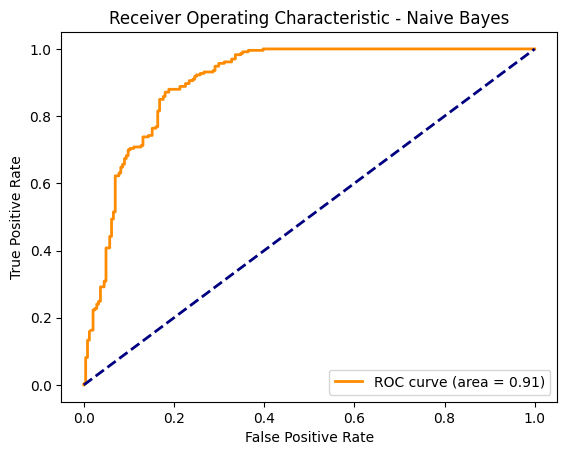

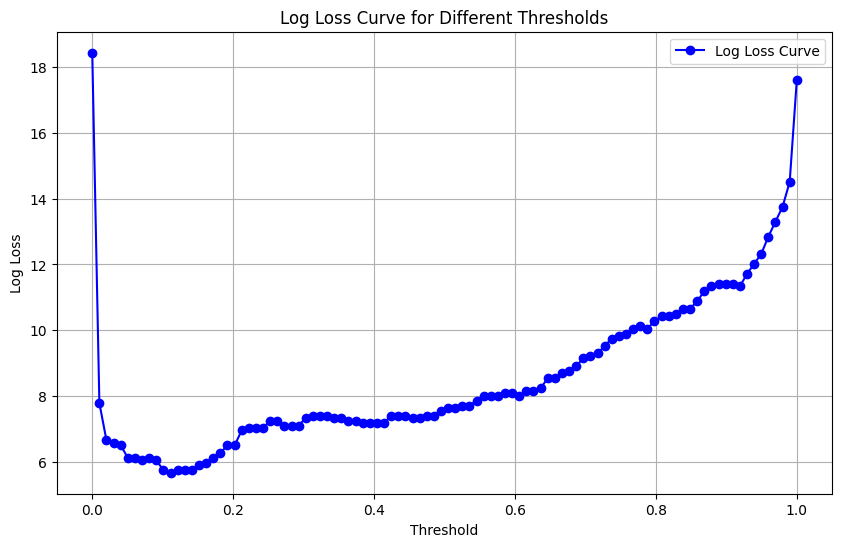

Predicted Class: Healthy


In [62]:
import os
import csv
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import log_loss

# Load and preprocess data
df = pd.read_csv('images_labels.csv')
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

base_dir = 'breastcancer'
train_dir = os.path.join(base_dir, 'train')
resized_dir = os.path.join(train_dir, 'resized_noisy')
csv_filename = 'images_labels_resized.csv'

flattened_images_list = []
labels_list = []

with open(csv_filename, 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    next(csv_reader)  # Skip header

    for row in csv_reader:
        image_name, label = row
        image_path = os.path.join(resized_dir, image_name)

        with Image.open(image_path) as img:
            img_arr = np.array(img)
            flattened_img_arr = img_arr.flatten()
            flattened_images_list.append(flattened_img_arr)
            labels_list.append(int(label))

X = np.array(flattened_images_list)
y = np.array(labels_list)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler_filename = 'nb_scaler.joblib'
dump(scaler, scaler_filename)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# Apply PCA
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
pca_filename = 'nb_pca.joblib'
dump(pca, pca_filename)

# Train Naive Bayes model
gnb = GaussianNB()
gnb.fit(x_train_pca, y_train)

# Save the model
model_filename_nb = 'best_model_NB.joblib'
dump(gnb, model_filename_nb)

# Make predictions and evaluate
y_pred_nb = gnb.predict(x_test_pca)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Test Accuracy: {accuracy_nb}")

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(cm_nb)

# ROC Curve and AUC
y_scores_nb = gnb.predict_proba(x_test_pca)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Define a range of thresholds
thresholds = np.linspace(0, 1, 100)

# List to store log loss values
log_loss_values = []

# Calculate log loss for each threshold
for threshold in thresholds:
    # Convert probabilities to binary classification based on current threshold
    y_pred_threshold = (y_scores_nb >= threshold).astype(int)
    
    # Calculate and store log loss
    loss = log_loss(y_test, y_pred_threshold)
    log_loss_values.append(loss)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, log_loss_values, marker='o', color='b', label='Log Loss Curve')
plt.title('Log Loss Curve for Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()

# Function to predict the class of an image using the trained Naive Bayes model
def predict_image_class_nb(image_path, scaler, pca, model):
    with Image.open(image_path) as img:
        img_arr = np.array(img)
        flattened_img_arr = img_arr.flatten()

    scaled_img = scaler.transform([flattened_img_arr])
    pca_img = pca.transform(scaled_img)

    prediction = model.predict(pca_img)
    return prediction[0]

# Example usage
clf_loaded_nb = load(model_filename_nb)

image_path_nb = r'breastcancer\train\resized_noisy\H_48.jpg'  # Replace with the path to your image
predicted_class_nb = predict_image_class_nb(image_path_nb, scaler, pca, clf_loaded_nb)
predicted_label_nb = le.inverse_transform([predicted_class_nb])
print(f'Predicted Class: {predicted_label_nb[0]}')


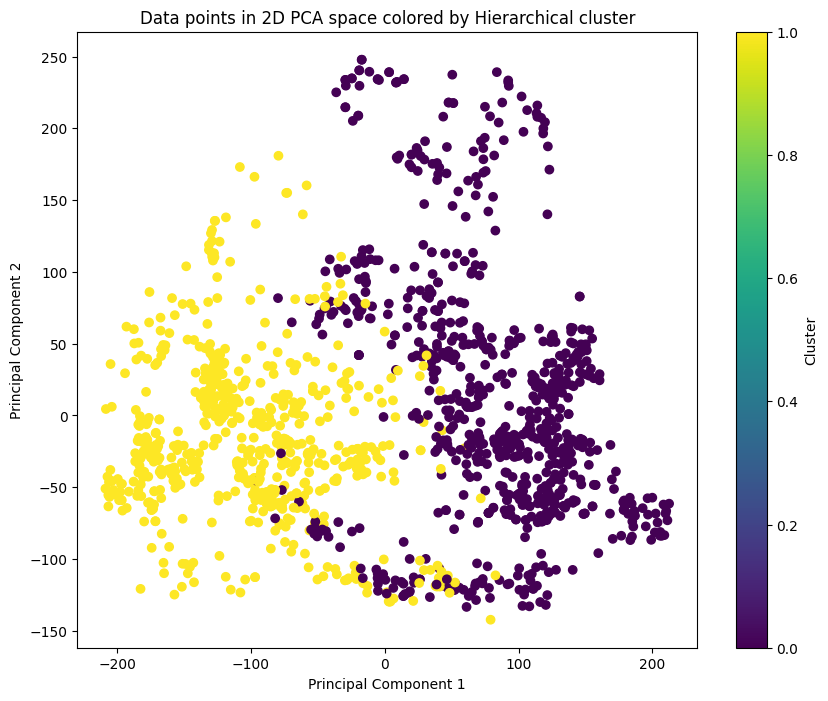

In [1]:
import os
import csv
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

# Load data
df = pd.read_csv('images_labels.csv')

base_dir = 'breastcancer'
train_dir = os.path.join(base_dir, 'train')
resized_dir = os.path.join(train_dir, 'resized_noisy')
csv_filename = 'images_labels_resized.csv'

flattened_images_list = []

with open(csv_filename, 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    next(csv_reader)  # Skip header

    for row in csv_reader:
        image_name = row[0]
        image_path = os.path.join(resized_dir, image_name)

        with Image.open(image_path) as img:
            img_arr = np.array(img)
            flattened_img_arr = img_arr.flatten()
            flattened_images_list.append(flattened_img_arr)

X = np.array(flattened_images_list)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler_filename = 'hierarchical_scaler.joblib'
dump(scaler, scaler_filename)

# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
pca_filename = 'hierarchical_pca.joblib'
dump(pca, pca_filename)

# Apply Hierarchical clustering
n_clusters = 2  # For example, to divide data into two clusters
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_clusters = hierarchical_model.fit_predict(X_pca)

# Save the Hierarchical model (Note: This only saves the labels, not the model itself)
model_filename_hierarchical = 'hierarchical_model_labels.joblib'
dump(hierarchical_clusters, model_filename_hierarchical)

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_clusters, cmap='viridis', marker='o')
plt.title('Data points in 2D PCA space colored by Hierarchical cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()




# CNN

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Conv2D, UpSampling2D, MaxPooling2D, Flatten, Dense
from keras import Sequential
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np

In [4]:
path = r'input'
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  )

train = train_datagen.flow_from_directory(
    path, 
    target_size=(256, 256), 
    batch_size=32, 
    class_mode='binary'  
)

Found 1444 images belonging to 2 classes.


In [5]:
X = []
Y = []

# Iterate over the generator to extract all data
for _ in range(train.samples // train.batch_size):
    x, y = next(train)
    X.extend(x)
    Y.extend(y)

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  
])

In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       

In [8]:
keras.utils.plot_model(model, "my_first_model.png",show_layer_names=True, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
history = keras.callbacks.History()
model.fit(X, Y, epochs=3, batch_size=32,callbacks=[history],validation_split=0.2)

Epoch 1/3


36/36 [==============================] - 33s 865ms/step - loss: 0.6284 - accuracy: 0.6484 - val_loss: 0.4012 - val_accuracy: 0.8056
Epoch 2/3
36/36 [==============================] - 30s 828ms/step - loss: 0.2264 - accuracy: 0.9193 - val_loss: 0.2899 - val_accuracy: 0.8924
Epoch 3/3
36/36 [==============================] - 30s 824ms/step - loss: 0.0572 - accuracy: 0.9783 - val_loss: 0.3821 - val_accuracy: 0.8924


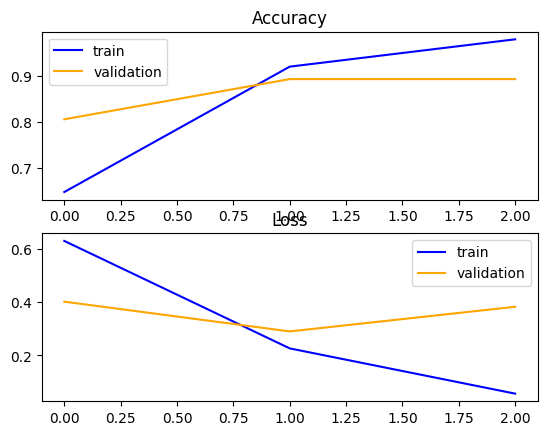

In [10]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='validation')
plt.legend()
plt.subplot(212)
plt.title('Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='validation')
plt.legend()

In [11]:
sample_image = np.expand_dims(X[0], axis=0)
activaitons_model_1 = keras.Model(inputs = model.inputs,outputs = model.layers[0].output)
activations_model_2=keras.Model(inputs = model.input,outputs= model.layers[2].output)
activaitons_model_3 = keras.Model(inputs = model.inputs,outputs= model.layers[4].output)
a1 = activaitons_model_1.predict(sample_image)
a2 = activations_model_2.predict(sample_image)
a3 = activaitons_model_3.predict(sample_image)

1/1 [==============================] - 0s 67ms/step


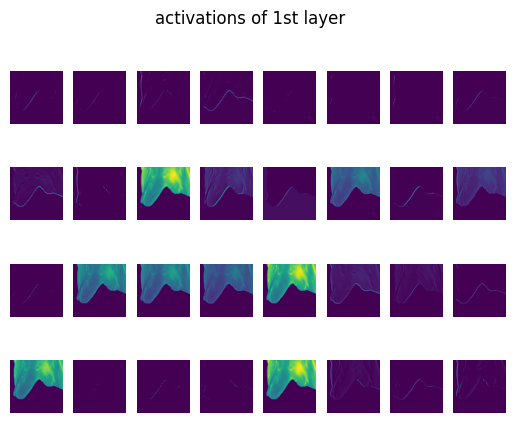

In [12]:
import matplotlib.pyplot as plt
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(a1[0,:,:,i],cmap='viridis')
    plt.axis('off')
plt.suptitle("activations of 1st layer")
plt.show()

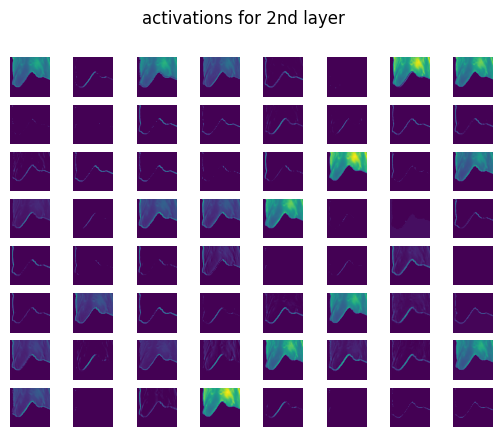

In [13]:
import matplotlib.pyplot as plt
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(a2[0,:,:,i],cmap='viridis')
    plt.axis('off')
plt.suptitle("activations for 2nd layer")
plt.show()

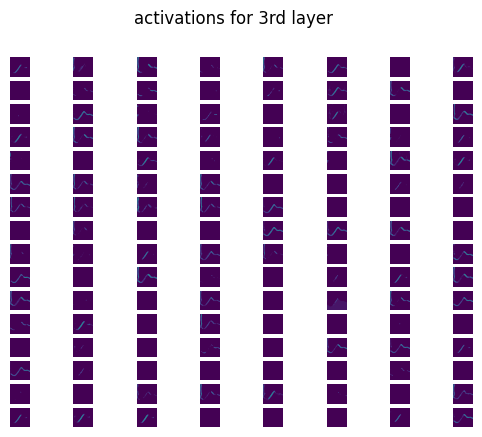

In [14]:
import matplotlib.pyplot as plt
for i in range(128):
    plt.subplot(16,8,i+1)
    plt.imshow(a3[0,:,:,i],cmap='viridis')
    plt.axis('off')
plt.suptitle("activations for 3rd layer")
plt.show()

In [15]:
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(256, 256))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  
    return image_array

image_path = r'input\Healthy\H_1.jpg'  
preprocessed_image = preprocess_image(image_path)

prediction = model.predict(preprocessed_image)

if prediction[0] > 0.5:
    print("The image is likely to be of a 'sick' case.")
else:
    print("The image is likely to be of a 'healthy' case.")

1/1 [==============================] - 0s 98ms/step
The image is likely to be of a 'healthy' case.
